In [18]:
from sklearn import svm
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
from sklearn.utils import shuffle
import random
import tensorflow as tf
import csv

from tensorflow.keras import layers, models
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [19]:
i_x=[]
for info in os.listdir(r'C:\Users\User\Desktop\rice_data\tr32'):
    #domain = os.path.abspath('my_train')
    info = os.path.join(r'C:\Users\User\Desktop\rice_data\tr32',info)
    img = cv2.imread(info)
    img=cv2.resize(img,(16,16))
    i_x.append(img)

In [20]:
def load_data():
 
    img_list = []
    label = []
 
    for pos_num in range(250,500):
        img_list.append(i_x[pos_num]/ 255.0)
        label.append(+1)
 
    for neg_num in range(250):
        img_list.append(i_x[neg_num]/ 255.0)
        label.append(0)
 
    return np.array(img_list), np.array(label)
 
def sliding_window(image, stepSize, windowSize):
 
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
 

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same',input_shape=(16, 16, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [23]:
import cv2
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import RepeatedStratifiedKFold

 


x_, y_ = load_data()   # x_train.shape = (128, 60, 65)  ,  len(y_train) = 128

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
ra=0
r_a=0
r_p=0
r_r=0
r_va=0
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1,random_state=36851234)
for train_index, test_index in rskf.split(x_, y_):
    X_train, X_test = x_[train_index], x_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    history=model.fit(X_train, y_train,validation_data=(X_test, y_test))
    r_a+=history.history['accuracy'][0]
    r_va+=history.history['val_accuracy'][0]
    yp=np.argmax(model.predict(X_test),axis=-1)
    ra+=accuracy_score(y_test,yp)
    r_p+=precision_score(y_test,yp,average=None)
    r_r+=recall_score(y_test,yp,average=None)
ra/=10
r_p/=10
r_r/=10

15/15 [==============================] - 0s 31ms/step - loss: 0.0375 - accuracy: 0.9933 - val_loss: 0.0130 - val_accuracy: 1.0000


In [24]:
print("Accuracy:%f"%ra)
print("-----------------------------------------------")
print("正precision: %f 負precision:%f"%(r_p[0],r_p[1]))
print("-----------------------------------------------")
print("正recall: %f 負recall:%f"%(r_r[0],r_r[1]))

Accuracy:0.986000
-----------------------------------------------
正precision: 0.973901 負precision:1.000000
-----------------------------------------------
正recall: 1.000000 負recall:0.972000


In [16]:
os.listdir(r'C:\Users\User\Desktop\rice_data\img600_400')

['DSC080542.JPG',
 'DSC080544.JPG',
 'DSC080593.JPG',
 'DSC080633.JPG',
 'DSC080693.JPG',
 'DSC080713.JPG',
 'DSC080733.JPG',
 'DSC080744.JPG',
 'DSC080823.JPG',
 'DSC080923.JPG',
 'DSC080991.JPG',
 'DSC080994.JPG',
 'DSC081024.JPG',
 'DSC081032.JPG',
 'DSC081034.JPG',
 'DSC081103.JPG',
 'DSC081132.JPG',
 'DSC081133.JPG',
 'DSC081142.JPG',
 'DSC081152.JPG',
 'DSC081433.JPG',
 'DSC081494.JPG',
 'DSC081543.JPG',
 'DSC081544.JPG',
 'DSC081691.JPG',
 'DSC081694.JPG',
 'DSC081722.JPG',
 'DSC081723.JPG',
 'DSC081873.JPG',
 'DSC082012.JPG',
 'DSC082013.JPG',
 'DSC082111.JPG',
 'DSC082113.JPG',
 'DSC082121.JPG',
 'DSC082122.JPG',
 'DSC082124.JPG',
 'DSC082142.JPG',
 'DSC082143.JPG',
 'DSC082152.JPG',
 'DSC082153.JPG',
 'DSC082154.JPG',
 'DSC082452.JPG',
 'DSC082453.JPG',
 'DSC082454.JPG',
 'DSC082752.JPG',
 'DSC082754.JPG',
 'DSC082762.JPG',
 'DSC082771.JPG',
 'DSC082773.JPG',
 'DSC082781.JPG',
 'DSC082783.JPG',
 'DSC082793.JPG',
 'DSC082794.JPG',
 'DSC082821.JPG',
 'DSC082823.JPG']

In [17]:
for info_ in os.listdir(r'C:\Users\User\Desktop\rice_data\img600_400'):
    #domain = os.path.abspath('my_train')
    info = os.path.join(r'C:\Users\User\Desktop\rice_data\img600_400',info_)
    print(info)
    tracking_space = cv2.imread(info)
    tracking_space=cv2.resize(tracking_space,(600,400))
    coord_list=[]
    img_list = []
    yis=0
    for y in range(0,tracking_space.shape[0]):
        if y<yis:
            continue
        xis=0
        hasRice=0
        maxWinSiz=10
        for x in range(0,tracking_space.shape[1]):
            if x<xis:
                continue        
            score=0
            for windowsize in [14,18,22]:     #搜索大小
                if y+windowsize>tracking_space.shape[0]:
                    continue
                if x+windowsize>tracking_space.shape[1]:
                    continue             
                window=tracking_space[y:y + windowsize, x:x + windowsize]
                win_flatten=cv2.resize(window,(16,16))/255.0
                tp=np.array([win_flatten])
                [p] = model.predict(tp)
                if p[1]>score:
                    score=p[1]
                    bestWinSize=windowsize
                
        
            if score > 0.94:
                maxWinSiz=max(maxWinSiz,bestWinSize)
                xis=x+bestWinSize*(0.89)
                hasRice=1
                coord_list.append([int((x + bestWinSize/2)*5), int((y + bestWinSize/2)*5)])

 
        if hasRice==1:
            yis=y+maxWinSiz*(0.9)
            
    csv_name=''.join([info[0:-13],info_[0:-4],'.csv'])
    with open(csv_name, 'w', newline='') as f:
    # using csv.writer method from CSV package
        write = csv.writer(f)    
        write.writerows(coord_list)

C:\Users\User\Desktop\rice_data\img600_400\DSC080542.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080544.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080593.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080633.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080693.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080713.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080733.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080744.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080823.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080923.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080991.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC080994.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC081024.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC081032.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC081034.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC081103.JPG
C:\Users\User\Desktop\rice_data\img600_400\DSC081132.JPG
C:\Users\User\Desktop\rice_data

In [29]:
for info_ in os.listdir(r'C:\Users\User\Desktop\rice_data\img460_346'):
    #domain = os.path.abspath('my_train')
    info = os.path.join(r'C:\Users\User\Desktop\rice_data\img460_346',info_)
    print(info)
    tracking_space = cv2.imread(info)
    tracking_space=cv2.resize(tracking_space,(int(2300/5),int(1730/5)))
    coord_list=[]
    img_list = []
    yis=0
    for y in range(0,tracking_space.shape[0]):
        if y<yis:
            continue
        xis=0
        hasRice=0
        maxWinSiz=10
        for x in range(0,tracking_space.shape[1]):
            if x<xis:
                continue        
            score=0
            for windowsize in [14,18,22]:     #搜索大小
                if y+windowsize>tracking_space.shape[0]:
                    continue
                if x+windowsize>tracking_space.shape[1]:
                    continue             
                window=tracking_space[y:y + windowsize, x:x + windowsize]
                win_flatten=cv2.resize(window,(16,16))/255.0
                tp=np.array([win_flatten])
                [p] = model.predict(tp)
                if p[1]>score:
                    score=p[1]
                    bestWinSize=windowsize
                
        
            if score > 0.:
                maxWinSiz=max(maxWinSiz,bestWinSize)
                xis=x+bestWinSize*(0.89)
                hasRice=1
                coord_list.append([int((x + bestWinSize/2)*5), int((y + bestWinSize/2)*5)])

 
        if hasRice==1:
            yis=y+maxWinSiz*(0.9)
            
    csv_name=''.join([info[0:-31],info_[0:-4],'.csv'])
    with open(csv_name, 'w', newline='') as f:
    # using csv.writer method from CSV package
        write = csv.writer(f)    
        write.writerows(coord_list)

C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_035928_0018_RGB4.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_035933_0023_RGB4.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_035938_0027_RGB3.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_035957_0043_RGB2.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040011_0054_RGB1.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040020_0062_RGB2.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040021_0063_RGB2.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040041_0079_RGB3.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040103_0098_RGB3.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040103_0098_RGB4.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040105_0099_RGB1.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040108_0102_RGB1.JPG
C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040108_0102_RGB2.JPG
C:\Users\User\Desktop\ric

In [107]:
''.join([info[0:-31],info_[0:-4],'.csv'])

'C:\\Users\\User\\Desktop\\rice_data\\img460_346\\IMG_170406_035928_0018_RGB4.csv'

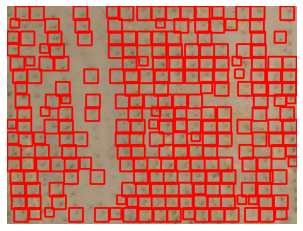

In [28]:
tracking_space = cv2.imread(r'C:\Users\User\Desktop\rice_data\img460_346\IMG_170406_040406_0250_RGB2.JPG')  # tracking_space.shape = (300, 300, 3)
tracking_space=cv2.resize(tracking_space,(int(2300/5),int(1730/5)))
tracking_space_g = cv2.cvtColor(tracking_space, cv2.COLOR_BGR2GRAY)
try:  
    clone
    del clone
except: 
    pass
 
img_list = []
score_map = []

yis=0
for y in range(0,tracking_space.shape[0]):
    if y<yis:
        continue
    xis=0
    hasRice=0
    maxWinSiz=10
    for x in range(0,tracking_space.shape[1]):
        if x<xis:
            continue        
        score=0
        for windowsize in [14,18,22]:     #搜索大小
            if y+windowsize>tracking_space.shape[0]:
                continue
            if x+windowsize>tracking_space.shape[1]:
                continue             
            window=tracking_space[y:y + windowsize, x:x + windowsize]
            win_flatten=cv2.resize(window,(16,16))/255.0
            tp=np.array([win_flatten])
            [p] = model.predict(tp)
            if p[1]>score:
                score=p[1]
                bestWinSize=windowsize
                
        
        if score > 0.6:
            try:
                clone                           # 若 clone 存在，跑 try
                tracking_space = clone          # 在已存在的clone 先 assign 回 tracking_space ，再將clone標註新的紅框
            except:                           # 若 clone 不存在，跑 except
                clone = tracking_space.copy()   # 第一次偵測到小小兵，先用 tracking_space 建立clone，再標註紅框 
            maxWinSiz=max(maxWinSiz,bestWinSize)
            xis=x+bestWinSize*(0.89)
            hasRice=1
            img = cv2.rectangle(clone, (x, y), (x + bestWinSize, y + bestWinSize), (0, 0, 255), 2)
  
        else:
            try:                                                     
                clone                           # 若 clone 存在，跑 try
                clone1 = clone.copy()           # 曾偵測到過小小兵，用clone標註綠框掃過
        
            except:                           #若 clone 不存在，跑 except
                clone1 = tracking_space.copy()  # 未曾偵測到過小小兵，用待搜尋原圖標註綠框掃過
 
            img = cv2.rectangle(clone1, (x, y), (x + bestWinSize, y + bestWinSize), (0, 255, 0), 2)
 
    # 轉換channel順序放進list
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        n1im=img
        plt.axis('off')
        img = plt.imshow(img) 
        img_list.append([img])
    if hasRice==1:
        yis=y+maxWinSiz*(0.9)

In [16]:
n1im=n1im[:,:,[2,1,0]]
cv2.imwrite(r'C:\Users\User\Desktop\CNN1_ans.jpg',n1im)

True

True

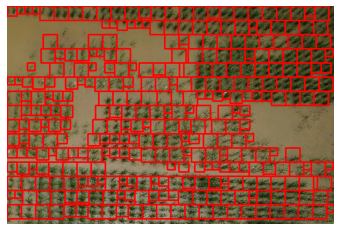

In [14]:
#方框無重疊版
tracking_space = cv2.imread(r'C:\Users\User\Desktop\f76904d2a919a70bc28cd6bdc565891e.jpg')  # tracking_space.shape = (300, 300, 3)
tracking_space=cv2.resize(tracking_space,(600,400))
tracking_space_g = cv2.cvtColor(tracking_space, cv2.COLOR_BGR2GRAY)
try:  
    clone
    del clone
except: 
    pass
 
img_list = []
score_map = []

yis=0
for y in range(0,tracking_space.shape[0]):
    if y<yis:
        continue
    xis=0
    hasRice=0
    maxWinSiz=10
    for x in range(0,tracking_space.shape[1]):
        if x<xis:
            continue        
        score=0
        for windowsize in [14,18,22,26]:     #搜索大小
            if y+windowsize>tracking_space.shape[0]:
                continue
            if x+windowsize>tracking_space.shape[1]:
                continue             
            window=tracking_space[y:y + windowsize, x:x + windowsize]
            win_flatten=cv2.resize(window,(16,16))/255.0
            tp=np.array([win_flatten])
            [p] = model.predict(tp)
            if p[1]>score:
                score=p[1]
                bestWinSize=windowsize
                
        
        if score > 0.87:
            try:
                clone                           # 若 clone 存在，跑 try
                tracking_space = clone          # 在已存在的clone 先 assign 回 tracking_space ，再將clone標註新的紅框
            except:                           # 若 clone 不存在，跑 except
                clone = tracking_space.copy()   
            maxWinSiz=max(maxWinSiz,bestWinSize)
            xis=x+bestWinSize
            hasRice=1
            img = cv2.rectangle(clone, (x, y), (x + bestWinSize, y + bestWinSize), (0, 0, 255), 2)
  
        else:
            try:                                                     
                clone                           # 若 clone 存在，跑 try
                clone1 = clone.copy()           
        
            except:                           #若 clone 不存在，跑 except
                clone1 = tracking_space.copy() 
 
            img = cv2.rectangle(clone1, (x, y), (x + bestWinSize, y + bestWinSize), (0, 255, 0), 2)
 
    # 轉換channel順序放進list
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        n2im=img
        plt.axis('off')
        img = plt.imshow(img) 
        img_list.append([img])
    if hasRice==1:
        yis=y+maxWinSiz

In [17]:
n2im=n2im[:,:,[2,1,0]]
cv2.imwrite(r'C:\Users\User\Desktop\CNN2_ans.jpg',n2im)

True